<a href="https://colab.research.google.com/github/tacerihsehc613/ML-board/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import stuff that we need
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as ds
from IPython.display import clear_output # if you get problem with this import you can skip it, it is used to print the cost later which can be skipped

!pip install numpy==1.19.4
!pip install matplotlib==3.3.3
!pip install scikit-learn==0.24.0

In [ ]:
assert np.__version__ == "1.19.4", "Looks like you don't have the same version of numpy as us!"
assert mpl.__version__ == "3.3.3", "Looks like you don't have the same version of matplotlib as us!"
assert sklearn.__version__ == "0.24.0", "Looks like you don't have the same version of sklearn as us!"

In [ ]:
data = ds.load_iris()

selected_features_idx = [0,1] #'sepal length (cm)', 'sepal width (cm)'
selected_targets = [0,1] #'setosa' 'versicolor'

idx = np.array([x in selected_targets for x in data.target])
x = data.data[:,selected_features_idx][idx]
y = data.target[idx]
y[y > 1] = 1 # Reset labels greater than 1 to 1

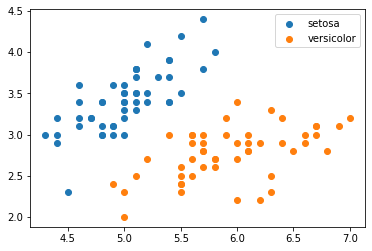

In [ ]:
plt.figure()
for label in np.unique(y):
    plt.scatter(x[:,0][y==label],x[:,1][y==label], label = data.target_names[label])
plt.legend()
plt.show()

In [ ]:
from scipy.special import expit
def z_x(x, bias, weights):
    """ param x: vector containing measurements. x = [x1, x2]
        param bias: single value
        param weight: vector containing model weights. weights= [w1,w2]
        
        return: value of logistic regression model for defined x, bias and weights
    """
    x=np.array(x)
    weights=np.array(weights)
    #return(expit(sum(x*weights).item()+bias))
    return 1 / (1 + np.exp(-(sum(x*weights).item()+bias)))

In [ ]:
bias = np.random.normal()
weights = np.random.normal(size = len(x[0]))

predicted = []
for i in range(len(x)):
    yhat = z_x(x[i], bias, weights)
    predicted.append(round(yhat))

print('Accuracy: ', np.sum(np.equal(y,predicted)) / len(predicted))

Accuracy:  0.5


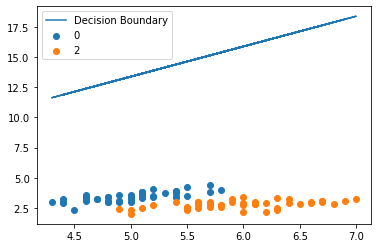

In [ ]:
x_values = x[:,0]
y_values = - (bias + weights[0]*x_values) / weights[1]

plt.figure()
plt.scatter(x[:,0][y==0],x[:,1][y==0], label = '0')
plt.scatter(x[:,0][y==1],x[:,1][y==1], label = '2')
plt.plot(x_values, y_values, label='Decision Boundary')
plt.legend()
plt.show()

In [ ]:
def cost_function(y, x, bias, weights):
    """ param y: Ground truth label for measurements
        param x: vector containing measurements. x = [x1, x2]
        param bias: single value
        param weight: vector containing model weights. weights= [w1,w2]
    
        return: value of the cost function. In this case BCE
    """
    z = z_x(x, bias, weights)
    cost = (-y * np.log(z) - (1 - y) * np.log(1 - z))
    return cost

In [ ]:
def derivative_weights(y, x, bias, weights):
    """ param y: Ground truth label for measurements
        param x: vector containing measurements. x = [x1, x2]
        param bias: single value
        param weight: vector containing model weights. weights= [w1,w2]
    
        return: derivative of cost function with respect to the weights, dw = [dw1, dw2]
    """
    z = z_x(x, bias, weights)
    dw1 = x[0]*(z-y)
    dw2 = x[1]*(z-y)
    cost_deriv = [dw1, dw2]
    return cost_deriv

In [ ]:
def derivative_bias(y, x, bias, weights):
    """ param y: Ground truth label for measurements
        param x: vector containing measurements. x = [x1, x2]
        param bias: single value
        param weight: vector containing model weights. weights= [w1,w2]
    
        return: derivative of cost function with respect to the bias
    """
    z = z_x(x, bias, weights)
    cost_deriv = z-y
    return cost_deriv 

In [ ]:
lr = 0.2 #<-- specify learning rate

#initialize weights and bias as random
bias = np.random.normal()
weights = np.random.normal(size = len(x[0]))


number_of_iterations = 50 #<-- number of iterations to perform gradient descent

#Loop through training data and update the weights at each iteration
m=len(x)
for it in range(number_of_iterations):
# .. Code for gradient descent for logistic regression
  dw1=weights[0]
  dw2=weights[1]
  w1=0
  w2=0
  b0=0
  for i in range(len(x)):
    z = z_x(x[i], bias, weights)
    c_sum=0
    c_sum += cost_function(y[i], x[i], bias, weights)
    w = derivative_weights(y[i], x[i], bias, weights)
    w1+=w[0]
    w2+=w[1]
    b0 += derivative_bias(y[i], x[i], bias, weights)
  cost=c_sum / m
  w1 = w1 / m
  w2 = w2 / m
  b0 = b0 / m
  weights[0] = weights[0] - lr * w1
  weights[1] = weights[1] - lr * w2
  bias = bias - lr * b0
  clear_output(wait=True) # This is used to clear the output for cleaner printing, can be removed if it causes trouble.
  print('iteration: ', it, ' cost: ', cost) # In this case the variable for the current cost is called "cost"

iteration:  49  cost:  0.004349733121236157


In [ ]:
predicted = []
for i in range(len(x)):
    yhat = z_x(x[i], bias, weights)
    predicted.append(round(yhat))

print('Accuracy: ', np.sum(np.equal(y,predicted)) / len(predicted))

Accuracy:  0.99


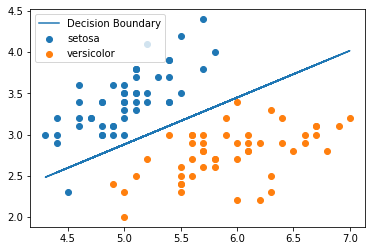

In [ ]:
x_values = x[:,0]
y_values = - (bias + weights[0]*x_values) / weights[1]

plt.figure()
for label in np.unique(y):
    plt.scatter(x[:,0][y==label],x[:,1][y==label], label = data.target_names[label])
plt.plot(x_values, y_values, label='Decision Boundary')
plt.legend()
plt.show()